# Data Story 6

This notebook is used as a part of the day 6 of my data stories.

Check my other notebooks for more data stories

Today I am going to analyze the data about US border crossings for various purposes.

Let's see what I can make out of the data

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/us-border-crossing-data/Border_Crossing_Entry_Data.csv


In [2]:
# importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

For now these libraries are just fine. Let's check the data and then decide whether I will need more or not.

In [3]:
#summoning the data demon
data = pd.read_csv('../input/us-border-crossing-data/Border_Crossing_Entry_Data.csv')
data.head(2)

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763


In [4]:
# let's check the shape to make an estimate of how big the data is
data.shape

(355511, 7)

Okay so the dataset is huge. 

It's not possible to analyze all at once. 

So it's better to break down the population into various samples and try to analyze them.

If you are wondering what population and samples are then check the link below.

[https://towardsdatascience.com/what-is-the-difference-between-population-and-sample-e13d17746b16](http://)

So samples are basically chunks of data used for a partiular task.(correct me if I am wrong)

In [5]:
#let's check the decription of the data
data.describe(include='all')

,Port Name,State,Port Code,Border,Date,Measure,Value
count,355511,355511,355511.000000,355511,355511,355511,3.555110e+05
unique,116,15,NaN,2,290,12,NaN
top,Eastport,ND,NaN,US-Canada Border,5/1/2010 00:00,Personal Vehicles,NaN
freq,5753,58290,NaN,272838,1356,31425,NaN
mean,NaN,NaN,2454.009921,NaN,NaN,NaN,2.844758e+04
std,NaN,NaN,1201.900231,NaN,NaN,NaN,1.518807e+05
min,NaN,NaN,101.000000,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,2304.000000,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,3013.000000,NaN,NaN,NaN,1.000000e+02
75%,NaN,NaN,3402.000000,NaN,NaN,NaN,2.597500e+03


So it is confirmed that the dataset don't have any missing values at all.

Now let's decide on what qustions do I want to answer using the dataset.

In [6]:
# lets take a quick loot at the columns
data.columns

Index(['Port Name', 'State', 'Port Code', 'Border', 'Date', 'Measure',
       'Value'],
      dtype='object')

Some of the questions that come to my mind after seeing the columns names are as follows:-

1. Which is the busiest port?
2. Which state is having the highest border crossing through?
3. Which borders are the most used?
4. Which country is most associated in the border crossings?
5. Is there any pattern in the number of crossings with respect to any season of the year?
6. What type of vehicles are mostly used for crossing border?
7. Relation of the vehicles with value and comparing the value for different countries.

So let's start from the first question and move down the list.

# 1. Which is the busiest port?

In [7]:
#making a copy 
df = data.copy()

#lets look at the data
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545


In [8]:
#lets check unique number of ports in the data
print(df['Port Name'].nunique())

116


In [9]:
#let's check which port has highest frequency
df['Port Name'].value_counts()

Eastport               5753
Sumas                  3480
Nogales                3480
Portal                 3480
Calais                 3480
                       ... 
Bar Harbor             1068
Boquillas               261
Algonac                  33
Cross Border Xpress      29
Toledo-Sandusky          10
Name: Port Name, Length: 116, dtype: int64

So the Eastport seems to be the most busy among other ports. Let's check what state is it in, it's port number and also how much value it is brining to US.

But before all that I need to check the number of unique values in the dates columns once.

In [10]:
#converting Date to datetime instance
df['Date'] = pd.to_datetime(df['Date'])

#checking the numbr of unique dates
df['Date'].nunique()

290

In [11]:
#checking the beginning and end of data
df['Date']

0        2020-02-01
1        2020-02-01
2        2020-02-01
3        2020-02-01
4        2020-02-01
            ...    
355506   1996-01-01
355507   1996-01-01
355508   1996-01-01
355509   1996-01-01
355510   1996-01-01
Name: Date, Length: 355511, dtype: datetime64[ns]

So looking at the date column in partiular it is clear that the data contains info on every month from January 1996 to February 2020

It is found out that EastPort appears in the dataset most frequently.

But one thing to remember is that checking the port on an yearly basis may give us more insights.

In [12]:
df['Date'].dt.year.value_counts()

2010    16200
2005    16128
2006    16128
2008    16056
2007    16056
2009    16056
2004    15984
2015    15984
2011    15840
2012    15840
2013    15840
2014    15840
2003    15588
2001    14832
2000    14832
1999    14832
1998    14832
1997    14832
1996    14832
2002    14832
2016    13754
2017     9717
2019     9593
2018     9534
2020     1549
Name: Date, dtype: int64

In [13]:
# storing all unique years in a list
# ignoring 2020 as it have only 2 months of data
years = df['Date'].dt.year.unique().tolist()
years.remove(2020)
type(years)

list

Now for each of the years, I will check out the busiest port and try to visualise them.

In [14]:
df2 = df['Port Name'].value_counts().reset_index()
df2.loc[0]

index        Eastport
Port Name        5753
Name: 0, dtype: object

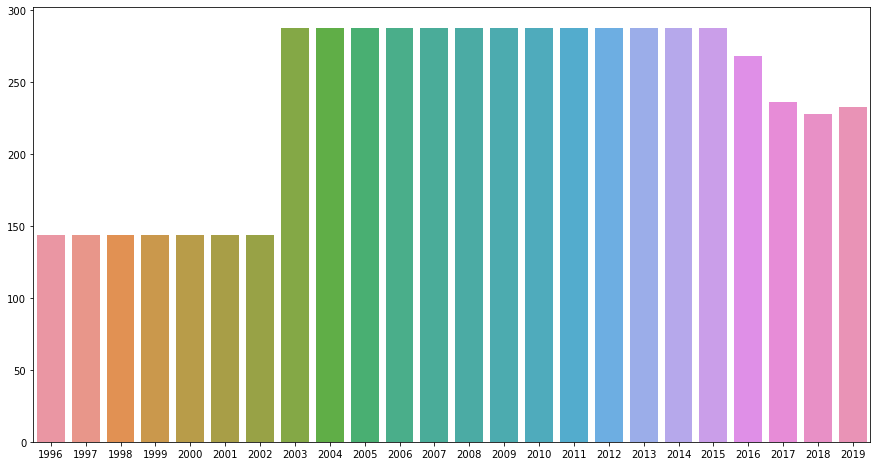

In [15]:
#creating two lists
counts = [] #counts of the busiest ports
busiest_ports = [] #busiest ports of the year
for year in years:
    df1 = df[df['Date'].dt.year==year]
    df1 = df1['Port Name'].value_counts().reset_index()
    busiest_ports.append(df1.loc[0]['index'])
    counts.append(df1.loc[0]['Port Name'])
    
fig = plt.figure(figsize=(15,8))
sns.barplot(years, counts)
plt.show()

In [16]:
busiest_ports[:20]

['Eastport',
 'Eastport',
 'Eastport',
 'Eastport',
 'Eastport',
 'Eastport',
 'Eastport',
 'Eastport',
 'Eastport',
 'Eastport',
 'Eastport',
 'Eastport',
 'Eastport',
 'Eastport',
 'Eastport',
 'Eastport',
 'Eastport',
 'Whitetail',
 'Whitetail',
 'Whitetail']

So now some interesting data came up.

Eastport is proved to be the most busiest port since 2003 but one thing to notice is that the number of crossing border is mostly same for consecutive years.

So it will be right to assume that the Eastport was built mainly for this purpose on 2003 and hence it saw huge rise.

Now let's plot the 5 busiest ports for each year

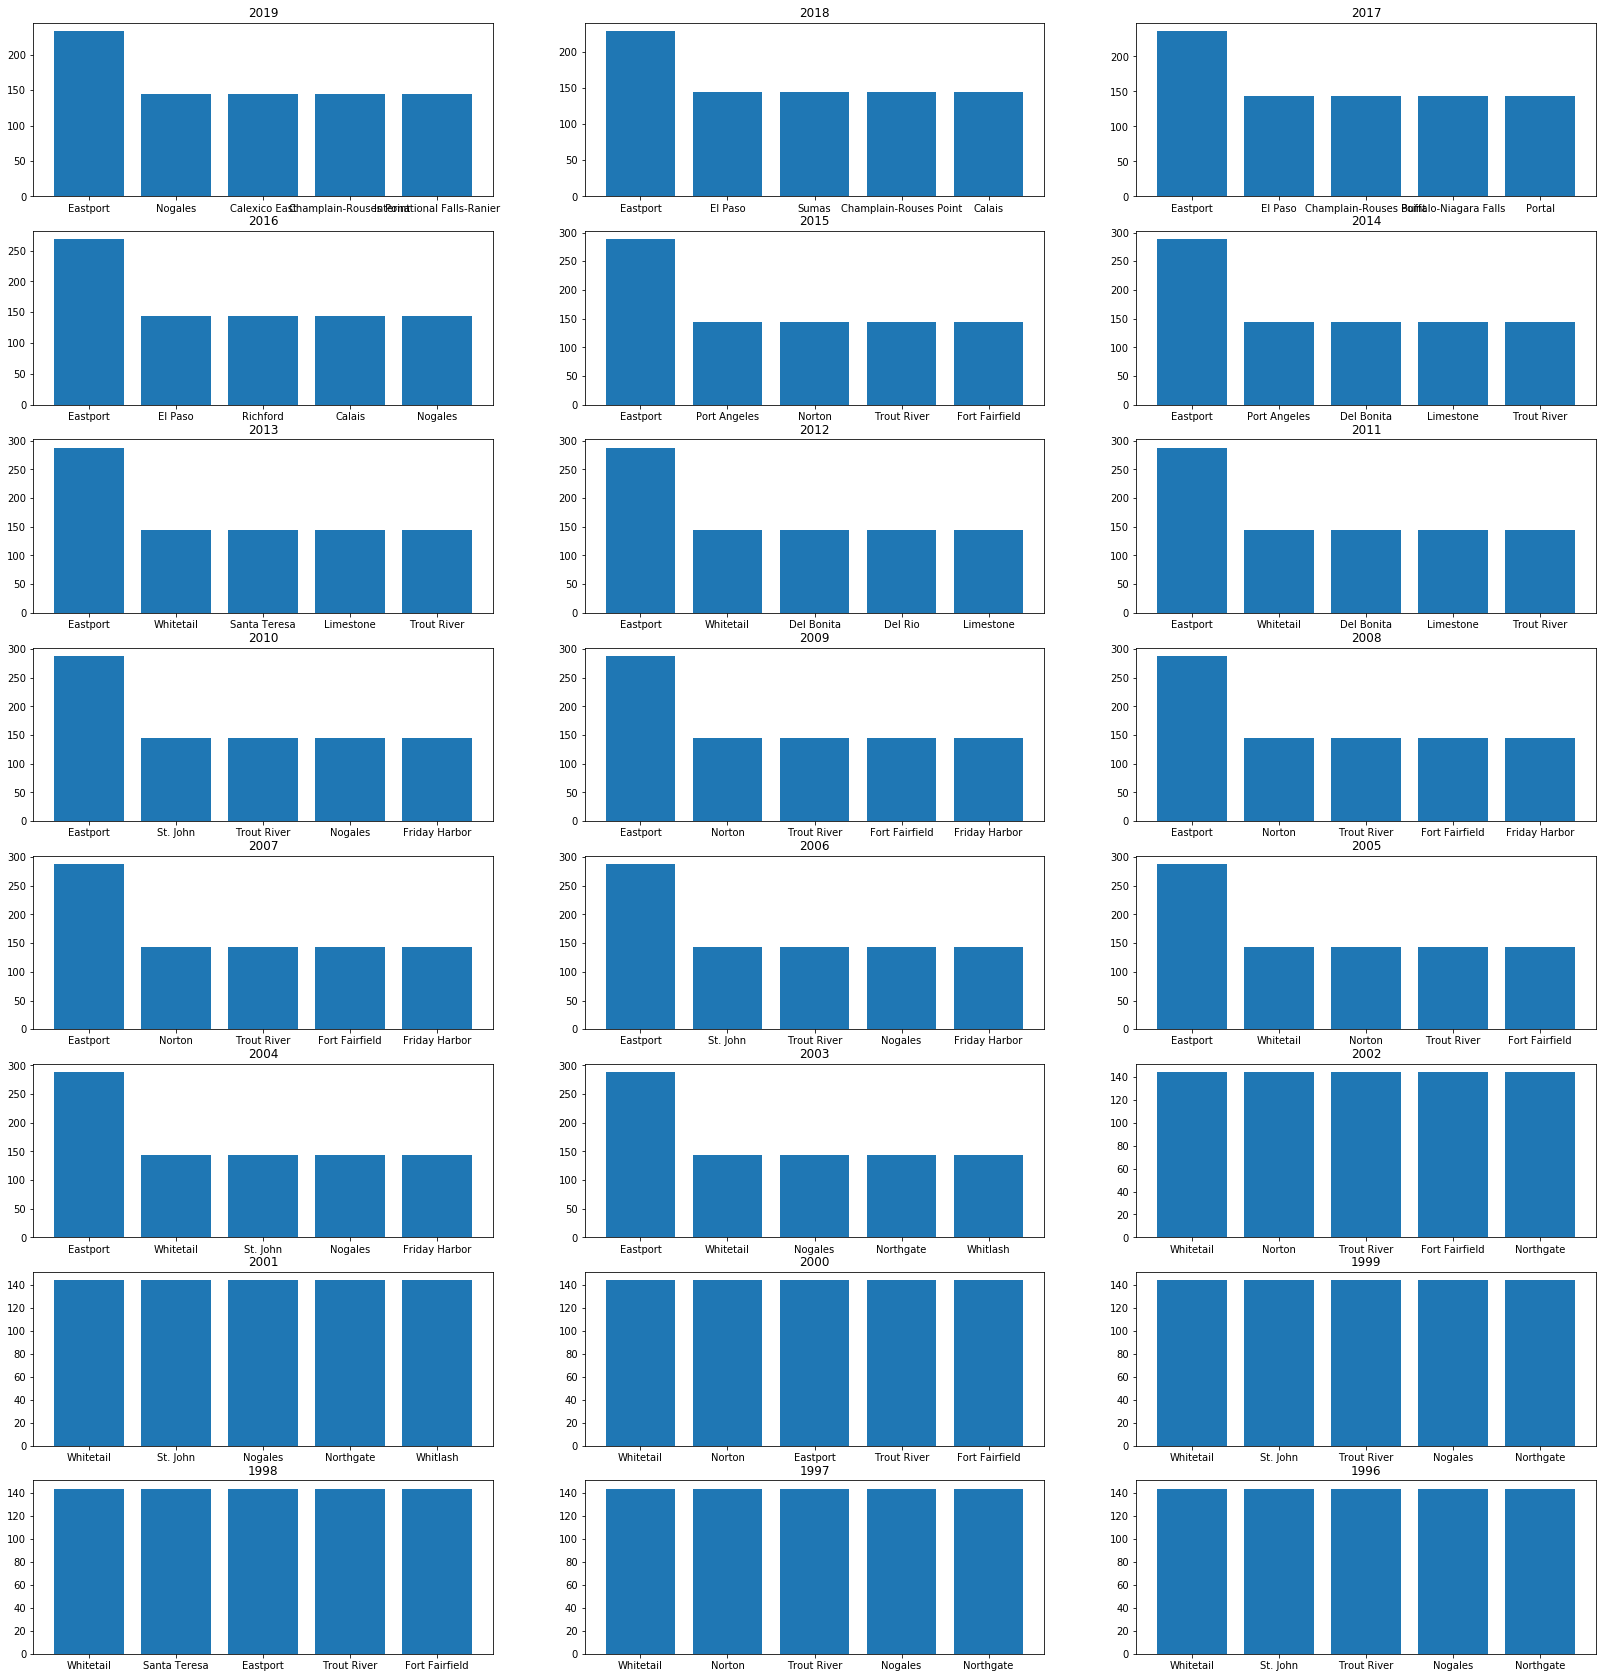

In [17]:
fig = plt.figure(figsize=(28,30))
for year,num in zip(years, range(1,25)):
    df1 = df[df['Date'].dt.year==year]
    df1 = df1['Port Name'].value_counts().reset_index()
    ax = fig.add_subplot(8,3,num)
    ax.bar(df1.loc[:4]['index'], df1.loc[:4]['Port Name'])
    ax.set_title(year)

It can be seen that the port Otay Mesa remained in the top 5 till 2016 but then it got out of sight. 

It can be assumed that the port was closed for some reason.

Now that we have found out the busiest I think it's about time I move to the second question.

# 2. Which state is having the highest border crossing through?

In [19]:
#getting a new copy of the data
df = data.copy()

#lets see the data
df.head(2)

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763


In [20]:
#lets see the unique number of states in the dataset
df['State'].nunique()

15

Okay so there are only 15 states involved with ports. This will be quick to analyse.

Let's see which state let most of the crossings in US in 2020

In [21]:
#converting date to datetime instance
df['Date'] = pd.to_datetime(df['Date'])

In [22]:
# creating a separate dataframe for 2020 data
df_2020 = df[df['Date'].dt.year==2020]

In [23]:
# checking unique states in 2020
df_2020['State'].unique()

array(['AK', 'NY', 'MI', 'ND', 'CA', 'MN', 'VT', 'WA', 'TX', 'ME', 'NM',
       'MT', 'AZ', 'ID'], dtype=object)

Now I have two options to choose the state bringing most crossings. Either I choose the count as I did in the case of ports.

Or I can choose the state based on the summation of all values that the state has brought in.

The second way looks a bit ambiguous since it is directly related to the measure(vehicle) used for crossing. 

The count looks more fair and hence I will stick to it.

In [24]:
df_2020['State'].value_counts()

ND    217
WA    197
TX    180
ME    169
MT    138
NY    112
MN    102
AZ     92
VT     88
CA     82
MI     72
ID     38
NM     31
AK     31
Name: State, dtype: int64

So the state with the most crossing is found to be North Dakota. Lets visualize the top 5

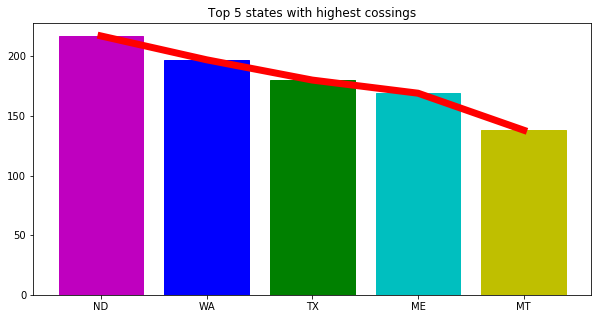

In [34]:
df1 = df_2020['State'].value_counts().reset_index()
fig = plt.figure(figsize=(10,5))
barlist = plt.bar(df1.loc[:4]['index'], df1.loc[:4]['State'])
barlist[0].set_color('m')
barlist[1].set_color('b')
barlist[2].set_color('g')
barlist[3].set_color('c')
barlist[4].set_color('y')
plt.plot(df1.loc[:4]['index'], df1.loc[:4]['State'], c='red',linewidth=7.0)
plt.title('Top 5 states with highest cossings')
plt.show()

I will end my today's analysis here. Let's continue with the next questions tomorrow.